# Getting started with Julia language

by [Koba Khitalishvili](http://www.kobakhit.com/about/)

## Table of contents
- [Download](#Download)
- [Quick Start](#Quick-start)
- [Dataframes, plotting, and file Input/Output](#Data-frames,-plotting,-and-file-Input/Output)
    - [Data frames](#Data-frames)
    - [Plotting data](#Plotting-data)
- [Conclusion](#Conclusion)
- [Resources used](#Resources-used)

## Download 

Download Julia from http://julialang.org/

Download Julai IDEs:

- Juno from http://junolab.org/

- IJulia kernel for Jyputer notebook from https://github.com/JuliaLang/IJulia.jl


Juno is a good IDE for writing and evaluating julia code quickly. IJulia notebook is good for writing tutorials and reports with julia code results embeded in the document. 

Once you've installed everything I recommend opening up the Juno IDE and going through the tutorial.

## Quick start

I execute all julia code below in Juno. I suggest you create a folder on your desktop and make it your working directory where we will be able to write files. First, a couple of basic commands. To evaluate code in Juno you just need to press `Ctrl-D` (its in the Juno tutrial):

In [122]:
VERSION # print julia version number

pwd() # print working directory
homedir() # print the default home directory

# cd(pwd()) # set working directory to DirectoryPath

"/Users/kobakhitalishvili"

In [123]:
3+5 # => 8
5*7 # => 35
3^17 # => 129140163
3^(1+3im) # im stands for imaginary number => -2.964383781426573 - 0.46089998526262876im
log(7) # natural log of 7 => 1.9459101490553132

1.9459101490553132

Interesting that julia has imaginary number built in. Now, variables and functions:

In [124]:
a = cos(pi) + im * sin(pi) # assigning to a variable

-1.0 + 1.2246467991473532e-16im

In [125]:
b = ℯ^(im*pi)

-1.0 + 1.2246467991473532e-16im

In [126]:
a == b # boolean expression. It is an euler identity.

true

Lets see how to define functions. Here is a [chapter on functions](https://docs.julialang.org/en/v1/manual/documentation/index.html#Functions-and-Methods-1) in julia docs for more info.

In [127]:
plus2(x) = x + 2 # a compact way

function plustwo(x) # traditional function definition
    return x+2
end

plustwo (generic function with 1 method)

In [128]:
plus2(11)

13

In [129]:
plustwo(11)

13

Here is a [julia cheatsheet](https://juliadocs.github.io/Julia-Cheat-Sheet/) with above and additional information in a concise form. Next, lets write a function that will generate some data which we will write to a csv file, plot, and save the plot. 

## Data frames, plotting, and file Input/Output

I decided to write a function $f(x)$ that performs the process from the [Collatz conjecture](https://en.wikipedia.org/wiki/Collatz_conjecture). Basically, for any positive integer $x$ if $x$ is even divide by $2$, if x is odd multiply by $3$ and add $1$. Repeat the process until you reach one. The Collatz conjecture proposes that regardless of what number you start with you will always reach one. Here it is in explicit form 

$$
f(x) = \begin{cases} x/2, & \mbox{if } x\mbox{ is even} \\ 3x+1, & \mbox{if } x\mbox{ is odd} \end{cases}
$$

The function `collatz(x)` will count the number of iterations it took for the starting number to reach $1$.

In [130]:
function collatz(x)
    # Given a number x
    # - divide by 2 if x is even
    # - multiply by 3 and add 1 if x is odd
    # until x reaches 1
    # Args:
    # - param x: integer
    # - return: integer
    count = 0
    while x != 1
        if x % 2 == 0
            x = x/2
            count += 1
        else
            x = 3*x + 1
            count += 1
        end
    end
    return count
end

collatz(2)

1

In [131]:
collatz(3)

7

### Data frames

Now, let's create a dataframe with the number of steps needed to complete the Collatz process for each number from 1 to 1000. We will use the [`DataFrames` package](https://github.com/JuliaStats/DataFrames.jl) because the base julia library does not have dataframes.

In [132]:
# install DataFrames package
using Pkg
# Pkg.add("DataFrames")

using DataFrames

# Before populating the dataframe with collatz data lets see how to create one
df = DataFrame(Col1 = 1:10, Col2 = ["a","b","c","d","e","f","a","b","c","d"])
df

10×2 DataFrame
│ Row │ Col1  │ Col2   │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 1     │ a      │
│ 2   │ 2     │ b      │
│ 3   │ 3     │ c      │
│ 4   │ 4     │ d      │
│ 5   │ 5     │ e      │
│ 6   │ 6     │ f      │
│ 7   │ 7     │ a      │
│ 8   │ 8     │ b      │
│ 9   │ 9     │ c      │
│ 10  │ 10    │ d      │

In [133]:
# Neat. Now let's generate data using collatz function
df = DataFrame(Number = 1:1000, NumofSteps = map(collatz,1:1000))
first(df, 10)

10×2 DataFrame
│ Row │ Number │ NumofSteps │
│     │ Int64  │ Int64      │
├─────┼────────┼────────────┤
│ 1   │ 1      │ 0          │
│ 2   │ 2      │ 1          │
│ 3   │ 3      │ 7          │
│ 4   │ 4      │ 2          │
│ 5   │ 5      │ 5          │
│ 6   │ 6      │ 8          │
│ 7   │ 7      │ 16         │
│ 8   │ 8      │ 3          │
│ 9   │ 9      │ 19         │
│ 10  │ 10     │ 6          │

`map()` applies `collatz()` function to every number in the `1:1000` array which is an array of numbers `[1,2,3,...,1000]`. In this instance `map()` returns an array of numbers that is the output of `collatz()` function. 


In [134]:
# To get descriptive statistics 
describe(df)

2×8 DataFrame. Omitted printing of 1 columns
│ Row │ variable   │ mean    │ min   │ median  │ max   │ nunique │ nmissing │
│     │ Symbol     │ Float64 │ Int64 │ Float64 │ Int64 │ Nothing │ Nothing  │
├─────┼────────────┼─────────┼───────┼─────────┼───────┼─────────┼──────────┤
│ 1   │ Number     │ 500.5   │ 1     │ 500.5   │ 1000  │         │          │
│ 2   │ NumofSteps │ 59.542  │ 0     │ 43.0    │ 178   │         │          │

Before we save it lets categorize the points based on whether the original number is even or odd.

In [135]:
df.evenodd = map(x -> if x % 2 == 0 "even" else "odd" end, 1:1000) # create new evenodd column
# rename!(df, :x1, :evenodd) #rename it to evenodd
first(df,5)

5×3 DataFrame
│ Row │ Number │ NumofSteps │ evenodd │
│     │ Int64  │ Int64      │ String  │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 1      │ 0          │ odd     │
│ 2   │ 2      │ 1          │ even    │
│ 3   │ 3      │ 7          │ odd     │
│ 4   │ 4      │ 2          │ even    │
│ 5   │ 5      │ 5          │ odd     │

I use the `map()` function with an anonymous function `x -> if x % 2 == 0 "even" else "odd" end` which checks for divisibility by 2 to create a column with "even" and "odd" as entries. Finally, I rename the new column "evenodd".

Additionally, let's identify the **prime numbers** as well.

In [136]:
# Pkg.add("Primes")
using Primes

isprime(3)

true

In [137]:
df.isprime = map(x -> if isprime(x) "yes" else "no" end,df.Number)
first(df,5)

5×4 DataFrame
│ Row │ Number │ NumofSteps │ evenodd │ isprime │
│     │ Int64  │ Int64      │ String  │ String  │
├─────┼────────┼────────────┼─────────┼─────────┤
│ 1   │ 1      │ 0          │ odd     │ no      │
│ 2   │ 2      │ 1          │ even    │ yes     │
│ 3   │ 3      │ 7          │ odd     │ yes     │
│ 4   │ 4      │ 2          │ even    │ no      │
│ 5   │ 5      │ 5          │ odd     │ yes     │

In [138]:
# Pkg.add("CSV")
using CSV

# To save the data frame in the working directory 
CSV.write("collatz.csv", df)

"collatz.csv"

### Plotting data

To plot the data we will use the [Gadfly](http://gadflyjl.org/stable/) package. Gadly resembles `ggplot` in its functionality. There is also the [`Plots` package](https://github.com/dcjones/Gadfly.jl) which brings mutliple plotting libraries into a single API.

To save plots in different image formats we will need the `Cairo` pakage.

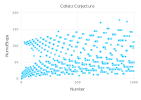

In [139]:
# Pkg.add(["Cairo","Fontconfig","Plots", "Gadfly","PlotlyJS","ORCA"])
# Pkg.add("Gadfly")

# using Plots
# plotlyjs() use plotly backend
# pyplot() use pyplot backend
using Cairo
using Gadfly

Gadfly.plot(df,x=:Number, y=:NumofSteps, Geom.point, Guide.title("Collatz Conjecture"))

Looks pretty. I will color the points based on whether the original number is even or odd. 

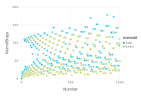

In [140]:
Gadfly.plot(df,x=:Number, y=:NumofSteps, color = :evenodd, Geom.point) # assign plot to variable

It looks like odd and even numbers might overlay each other. Let's plot even and odd numbers side by side.

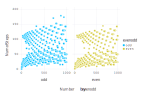

In [141]:
Gadfly.plot(df, xgroup=:evenodd, color = :evenodd,
    x=:Number, y=:NumofSteps,
    Geom.subplot_grid(Geom.point))

Even numbers up to 1000 require fewer steps to complete the Collatz procedure than odd numbers. Let's do the same for prime numbers.

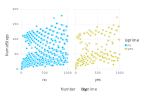

In [142]:
Gadfly.plot(df, xgroup=:isprime, color = :isprime,
    x=:Number, y=:NumofSteps,
    Geom.subplot_grid(Geom.point))

Seems like prime numbers follow a similar distribution of steps to that of non primes. Finally, let's plot this data by separating even, odd and prime numbers.

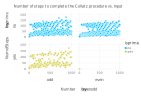

In [143]:
p = Gadfly.plot(df, xgroup=:evenodd, ygroup=:isprime, 
    color = :isprime,
    x=:Number, y=:NumofSteps,
    Geom.subplot_grid(Geom.point),
    Guide.title("Number of steps to complete the Collatz procedure vs. Input"))

Obvisouly, there are no even prime numbers except 2 and hence the plot in bottom right contains a lonely (2,1) point. Let's calculate the mean number of steps required for $x$ to complete the Collatz process by whether $x$ is even, odd or prime.

In [144]:
using Statistics
mean_steps = by(df, [:isprime, :evenodd], :NumofSteps => mean)
sort!(mean_steps,:NumofSteps_mean, rev=true)

4×3 DataFrame
│ Row │ isprime │ evenodd │ NumofSteps_mean │
│     │ String  │ String  │ Float64         │
├─────┼─────────┼─────────┼─────────────────┤
│ 1   │ no      │ odd     │ 66.8348         │
│ 2   │ yes     │ odd     │ 63.7305         │
│ 3   │ no      │ even    │ 53.3908         │
│ 4   │ yes     │ even    │ 1.0             │

You might have noticed the exclamation mark in `sort!`. The exclamation mark indicates to perform the operation in place instead of doing `df = sort(df)`.
It looks like even numbers on average require the least number of steps to complete the Collatz procedure. Non prime odd numbers require the most number of steps. There is only one prime even number which is 2 and 2 requires only one step. 

What does it tell us about the Collatz Conjecture? Nothing. This kind of analysis will not uncover any helpful insights, even though it may help visualize the behavior of numbers and their outputs generated by the Collatz function.

The Collatz Conjecture is one of the simplest unsolved problems in mathematics actually and [Terence Tao is the last mathematician to have made any kind of progress on it](https://terrytao.wordpress.com/2019/09/10/almost-all-collatz-orbits-attain-almost-bounded-values/). In September 2019 he proved that the Conjecture holds "almost true" for "almost all numbers". 

In [145]:
# Save the plot in the working directory
draw(PNG("collatz-plot.png", 6inch, 4inch), p)

## Conclusion
Julia is a comfortable language to work with and many say it is the future of scientific computing. It may very well be true. One of the main reasons is Julia's JIT compiler which makes Julia almost as fast and sometimes faster than C.  At this point, I find Julia not as good as R simply because R is more mature and has a bigger commmunity. R aslo has better documentation and more questions on Stackoverflow. There  are $728,009$ questions with an `R` tag in contrast to $16,583$ questions with `julia` tag as of 12/12/2019. 

Julia has been developing at a steady pace with growing community and ecosystem. Unlikely that Julia is going to be a competitor in the industry against Python, SAS and R, but in academia it is a different story. 

## Resources used

- [Julia manual](https://docs.julialang.org/en/v1/)
- [IJulia](https://github.com/JuliaLang/IJulia.jl)
- [DataFrames docs](https://juliadata.github.io/DataFrames.jl/stable/)
- [Gadfly docs](http://gadflyjl.org/stable/)